### For Ignore Warning

In [80]:
import warnings

from xgboost import XGBRegressor

warnings.filterwarnings("ignore")

# Suppress warnings from LightGBM
warnings.filterwarnings("ignore", category=FutureWarning, module="lightgbm")

# Suppress warnings from Scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

### Loading Dataset

In [81]:
import kagglehub
from pandas.core.interchange.dataframe_protocol import DataFrame

path = kagglehub.dataset_download("gauravmalik26/food-delivery-dataset/versions/1")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\hesha\.cache\kagglehub\datasets\gauravmalik26\food-delivery-dataset\versions\1


In [82]:
import pandas as pd

df = pd.read_csv(f"{path}/train.csv")

In [83]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [84]:
df.shape

(45593, 20)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

### Data Cleaning

##### Removing unwanted columns

In [86]:
df = df.drop(columns=["ID", "Delivery_person_ID"])

##### Remove leading and trailing spaces

In [87]:
# Extract data from columns
df["Time_taken(min)"] = df["Time_taken(min)"].apply(lambda x: x.split(" ")[1].strip())
df["Weatherconditions"] = df["Weatherconditions"].apply(lambda x: x.split(" ")[1].strip())

# Removing leading and trailing spaces
df["Road_traffic_density"] = df["Road_traffic_density"].apply(lambda x: x.strip())
df["City"] = df["City"].apply(lambda x: x.strip())
df["Type_of_vehicle"] = df["Type_of_vehicle"].apply(lambda x: x.strip())
df["Type_of_order"] = df["Type_of_order"].apply(lambda x: x.strip())

In [88]:
print(len(df[df.duplicated()])>0)

False


#### Handling Null Values

In [89]:
import numpy as np

def convert_nan(dataframe):
    dataframe.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df)
df.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
Restaurant_latitude               0
Restaurant_longitude              0
Time_Order_picked                 0
Order_Date                        0
Delivery_location_latitude        0
Delivery_location_longitude       0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_taken(min)                   0
dtype: int64

In [90]:
for col in df.columns:
    print(col, df[col].value_counts())
    print()

Delivery_person_Age Delivery_person_Age
35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
29    2191
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: count, dtype: int64

Delivery_person_Ratings Delivery_person_Ratings
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5      3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4      1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6        53
1        38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3         6
Name: count, dtype: int64

Restaurant_latitude Restaurant_latitude
 0.000000     3640
 26.911378     182
 26.914142     180
 26.902940     176
 26.902908     176
              ... 
-12.326356       1
-22.577821       1
-22.569367       1
-30.890184       1
-12.978453       1
Name: count, Length: 657, dtype

##### Visualize columns with null values to determine the appropriate statistic for filling them.

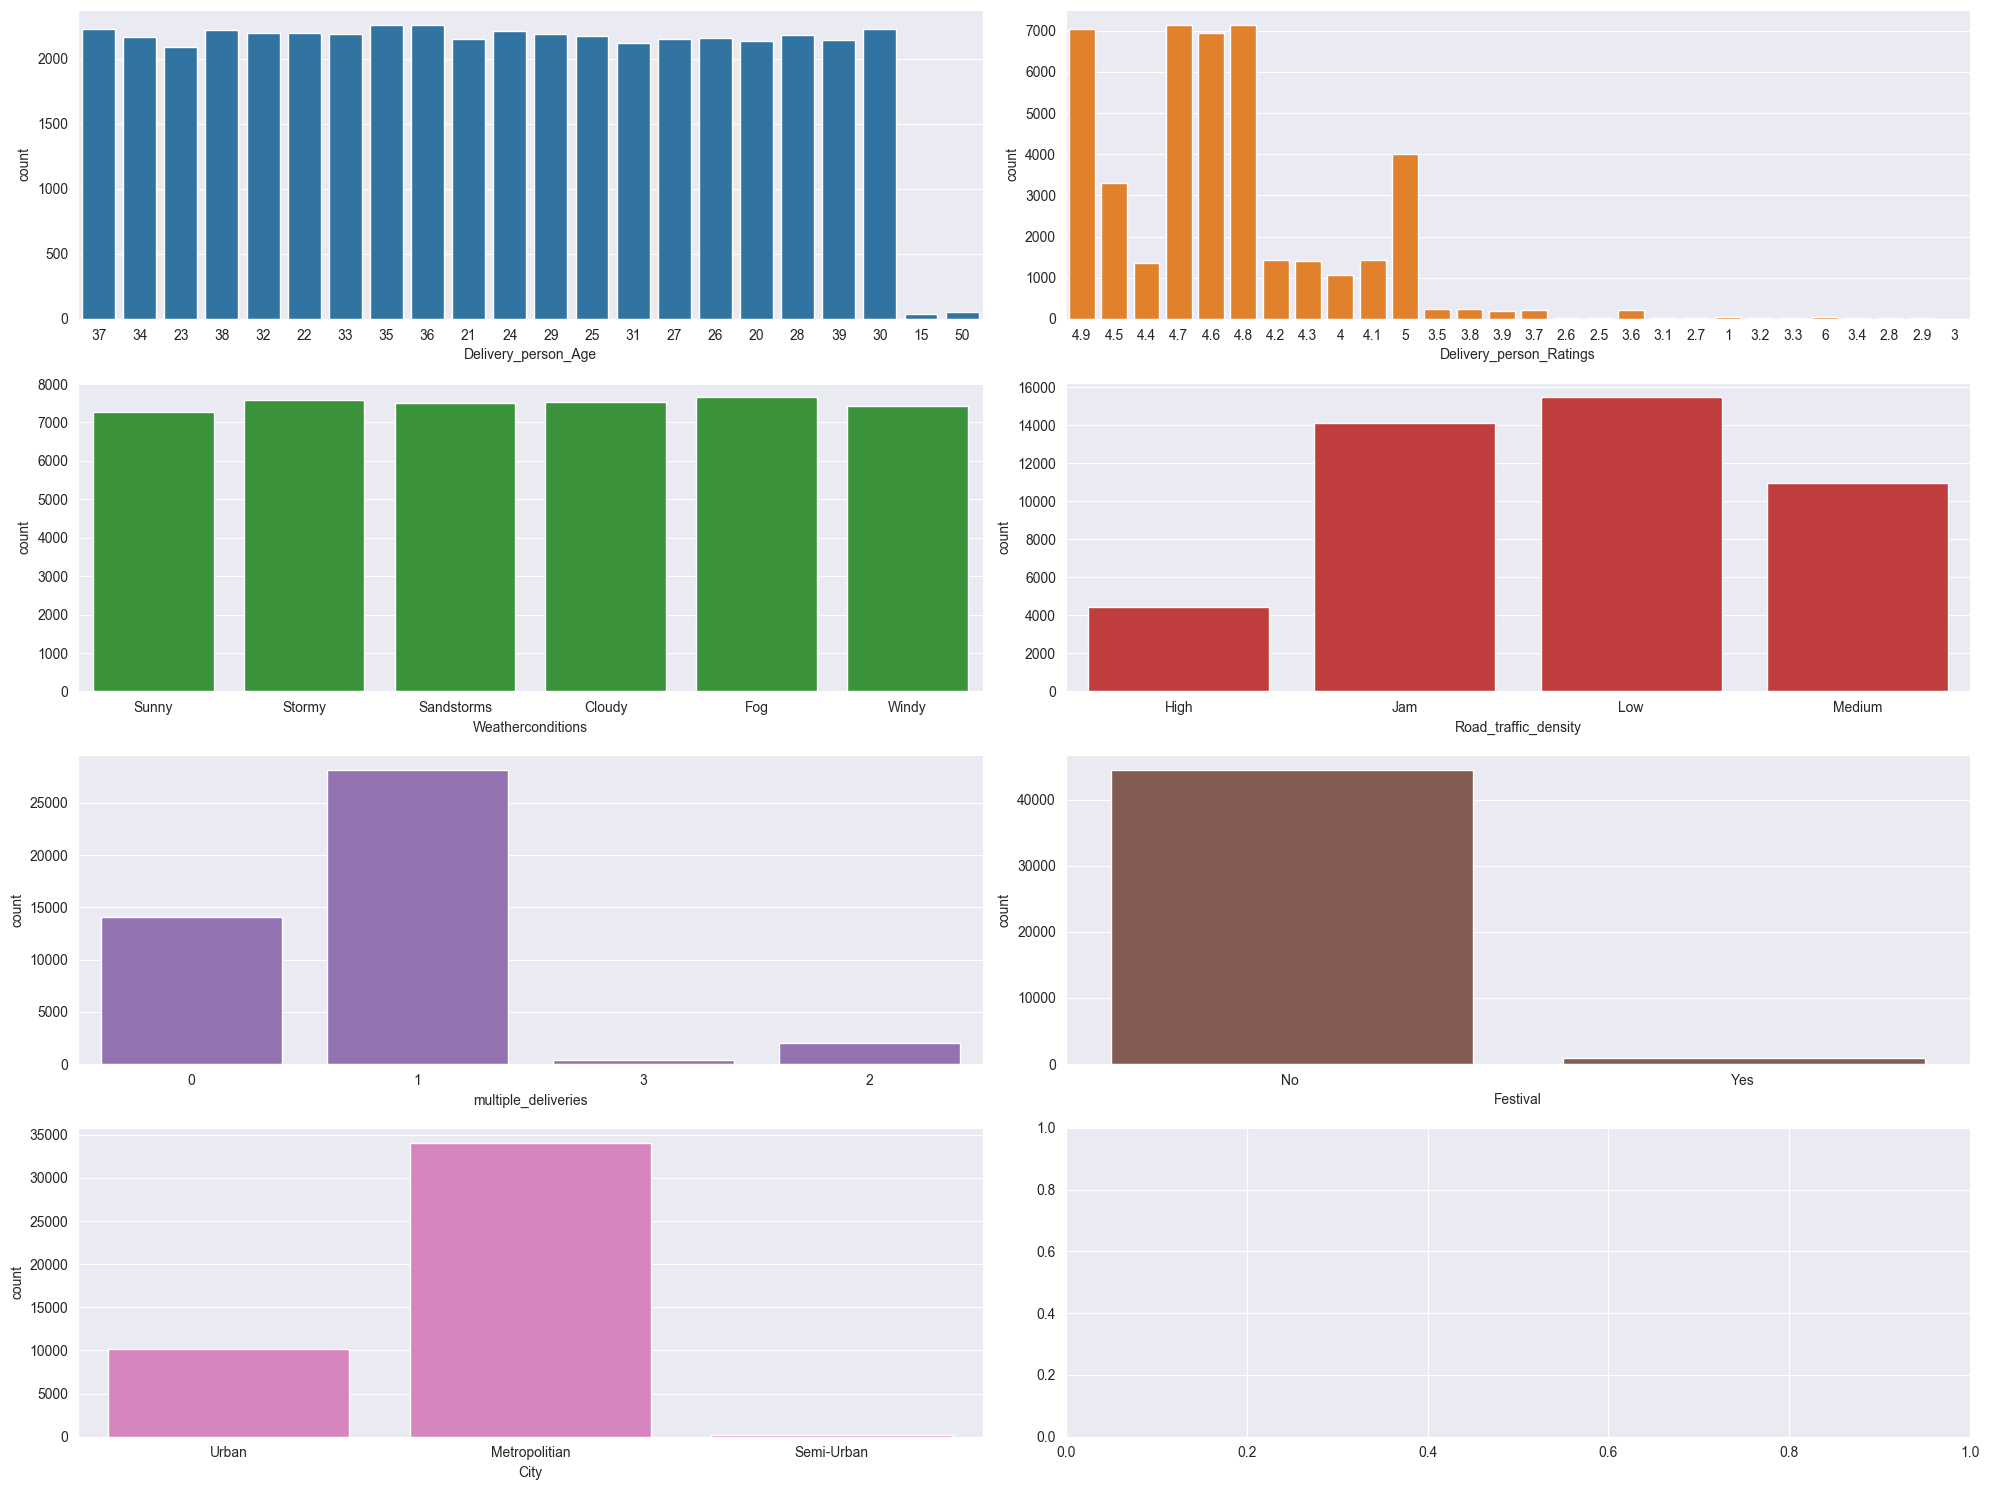

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(20,15))
columns = ['Delivery_person_Age','Delivery_person_Ratings','Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City']

for i, column in enumerate(columns):
    # every bar should have a random color
    color = sns.color_palette()[i]
    sns.countplot(x=column, data=df, ax=axs[i//2, i%2], color=color)

plt.tight_layout()
plt.show()

##### Fill null values with suitable statistic

In [92]:
df["Weatherconditions"] = df["Weatherconditions"].fillna(df["Weatherconditions"].mode()[0])
df["Road_traffic_density"] = df["Road_traffic_density"].fillna(df["Road_traffic_density"].mode()[0])
df["City"] = df["City"].fillna(df["City"].mode()[0])
df["multiple_deliveries"] = df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0])
df["Festival"] = df["Festival"].fillna(df["Festival"].mode()[0])

In [93]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)

In [94]:
df["Delivery_person_Age"] = df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].mean())
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean())

In [95]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


##### Change column data types

In [96]:
df['multiple_deliveries'] = df['multiple_deliveries'].astype(float)
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
df["Time_taken(min)"] = df["Time_taken(min)"].astype(float)
df["multiple_deliveries"] = df["multiple_deliveries"].astype(int)

### Feature Engineering

##### Creating new column containing the distance between the destination and the source using latitude and the longitude coordinates

In [97]:
from geopy.distance import geodesic

def give_distance(row):
    restaurant = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    customer = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    distance = geodesic(restaurant, customer).km
    return distance

In [98]:
df['distance'] = df.apply(give_distance, axis=1)

In [99]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,3.020737
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,20.143737
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,1.549693
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.774497
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,6.197898


##### Drop latitude and the longitude coordinate columns

In [100]:
df = df.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"])

In [101]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,37.0,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,3.020737
1,34.0,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,20.143737
2,23.0,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,1.549693
3,38.0,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.774497
4,32.0,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,6.197898


##### Creating new column containing time to prepare order

In [102]:
df["Time_Orderd"] = pd.to_timedelta(df["Time_Orderd"])
df["Time_Order_picked"] = pd.to_timedelta(df["Time_Order_picked"])

In [103]:
df["Order_DateTime"] = pd.to_datetime(df["Order_Date"] + df["Time_Orderd"])
df['Picked_DateTime'] = pd.to_datetime(df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked'])

In [104]:
df["Prepare_time"] = (df["Picked_DateTime"] - df["Order_DateTime"]).dt.total_seconds() / 60
df['Prepare_time'].fillna(df['Prepare_time'].median(), inplace=True)

In [105]:
df = df.drop(columns=["Order_Date", "Time_Orderd", "Time_Order_picked", "Order_DateTime", "Picked_DateTime"])

In [106]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,Prepare_time
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,3.020737,15.0
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,20.143737,5.0
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,1.549693,15.0
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,7.774497,10.0
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,6.197898,15.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  float64
 1   Delivery_person_Ratings  45593 non-null  float64
 2   Weatherconditions        45593 non-null  object 
 3   Road_traffic_density     45593 non-null  object 
 4   Vehicle_condition        45593 non-null  int64  
 5   Type_of_order            45593 non-null  object 
 6   Type_of_vehicle          45593 non-null  object 
 7   multiple_deliveries      45593 non-null  int64  
 8   Festival                 45593 non-null  object 
 9   City                     45593 non-null  object 
 10  Time_taken(min)          45593 non-null  float64
 11  distance                 45593 non-null  float64
 12  Prepare_time             45593 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 4.5+ MB


#### Data Encoding

##### Label Encoding

In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all columns the data type is object without using for loop
df_le = df.apply(lambda c: le.fit_transform(c) if c.dtype == 'object' else c)


##### One Hot Encoding

In [109]:
df_ohe = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, dtype=int)
df_ohe.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken(min),distance,Prepare_time,Weatherconditions_Cloudy,Weatherconditions_Fog,Weatherconditions_Sandstorms,...,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban
0,37.0,4.9,2,0,24.0,3.020737,15.0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,34.0,4.5,2,1,33.0,20.143737,5.0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
2,23.0,4.4,0,1,26.0,1.549693,15.0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,38.0,4.7,0,1,21.0,7.774497,10.0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,32.0,4.6,1,1,30.0,6.197898,15.0,1,0,0,...,1,0,0,0,1,1,0,1,0,0


### Model Building

#### Cross Validation

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
lgbr = LGBMRegressor(verbosity=-1)
xgbr = xgb.XGBRegressor()

isolated_models = [lr, dtr, rfr, abr, gbr, lgbr]

params = {
    'objective': 'reg:squarederror',  # Regression objective
    'eval_metric': 'rmse',           # Root Mean Square Error
    'max_depth': 6,
    'eta': 0.3
}

def get_cross_val_score(x, y, cv):
    x_min_max = min_max_scaler.fit_transform(x)
    x_standard = standard_scaler.fit_transform(x)

    dfs = ((x, "Not Scaled"), (x_standard, "Standard Scaled"), (x_min_max, "Min Max Scaled"))
    results = []

    def _cross_validation(x_data, y_data, label):
        dtrain = xgb.DMatrix(data=x_data, label=y_data)
        cv_results = xgb.cv(
            params=params,
            dtrain=dtrain,
            nfold=5,            # Number of folds
            seed=42,
            metrics="rmse",     # Metric for evaluation
            as_pandas=True      # Return results as a pandas DataFrame
        )

        mean_rmse = np.mean(cv_results['test-rmse-mean'])
        results.append({mean_rmse: f'Model: XGBoost ({label}) \nMean RMSE: {mean_rmse}\n'})

        for model in isolated_models:
            scores = cross_val_score(model, x, y, cv=cv, scoring='neg_root_mean_squared_error')
            results.append({-scores.mean(): f"Model: ({label}) {model.__class__.__name__}\nMean RMSE: {-scores.mean():.2f}"})

    for df in dfs:
        _cross_validation(df[0], y, df[1])

    orders_result = sorted(results, key=lambda d: list(d.keys())[0])

    for result in orders_result:
        for k in result:
            print(result[k])
            print()

##### Cross Validation Using Label Encoded Data

In [111]:
x = df_le.drop(columns=["Time_taken(min)"])
y = df_le["Time_taken(min)"]

get_cross_val_score(x, y, 5)

Model: (Not Scaled) LGBMRegressor
Mean RMSE: 3.90

Model: (Standard Scaled) LGBMRegressor
Mean RMSE: 3.90

Model: (Min Max Scaled) LGBMRegressor
Mean RMSE: 3.90

Model: (Not Scaled) RandomForestRegressor
Mean RMSE: 4.06

Model: (Standard Scaled) RandomForestRegressor
Mean RMSE: 4.06

Model: (Min Max Scaled) RandomForestRegressor
Mean RMSE: 4.06

Model: (Not Scaled) GradientBoostingRegressor
Mean RMSE: 4.47

Model: (Standard Scaled) GradientBoostingRegressor
Mean RMSE: 4.47

Model: (Min Max Scaled) GradientBoostingRegressor
Mean RMSE: 4.47

Model: XGBoost (Not Scaled) 
Mean RMSE: 5.208393432409793


Model: XGBoost (Standard Scaled) 
Mean RMSE: 5.208408709914126


Model: XGBoost (Min Max Scaled) 
Mean RMSE: 5.208428855524266


Model: (Not Scaled) DecisionTreeRegressor
Mean RMSE: 5.46

Model: (Standard Scaled) DecisionTreeRegressor
Mean RMSE: 5.46

Model: (Min Max Scaled) DecisionTreeRegressor
Mean RMSE: 5.46

Model: (Not Scaled) AdaBoostRegressor
Mean RMSE: 5.92

Model: (Standard Scaled)

##### Cross Validation Using One Hot Encoded Data

In [112]:
x = df_ohe.drop(columns=["Time_taken(min)"])
y = df_ohe["Time_taken(min)"]

get_cross_val_score(x, y, 5)

Model: (Not Scaled) LGBMRegressor
Mean RMSE: 3.92

Model: (Standard Scaled) LGBMRegressor
Mean RMSE: 3.92

Model: (Min Max Scaled) LGBMRegressor
Mean RMSE: 3.92

Model: (Not Scaled) RandomForestRegressor
Mean RMSE: 4.05

Model: (Standard Scaled) RandomForestRegressor
Mean RMSE: 4.05

Model: (Min Max Scaled) RandomForestRegressor
Mean RMSE: 4.05

Model: (Not Scaled) GradientBoostingRegressor
Mean RMSE: 4.55

Model: (Standard Scaled) GradientBoostingRegressor
Mean RMSE: 4.55

Model: (Min Max Scaled) GradientBoostingRegressor
Mean RMSE: 4.55

Model: XGBoost (Not Scaled) 
Mean RMSE: 5.2523992560425485


Model: XGBoost (Min Max Scaled) 
Mean RMSE: 5.2523992560425485


Model: XGBoost (Standard Scaled) 
Mean RMSE: 5.2529042601947715


Model: (Not Scaled) DecisionTreeRegressor
Mean RMSE: 5.48

Model: (Standard Scaled) DecisionTreeRegressor
Mean RMSE: 5.48

Model: (Min Max Scaled) DecisionTreeRegressor
Mean RMSE: 5.48

Model: (Not Scaled) AdaBoostRegressor
Mean RMSE: 6.04

Model: (Standard Scal

##### Split data

In [113]:
x = df_le.drop(columns=["Time_taken(min)"])
y = df_le["Time_taken(min)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##### Testing Model Accuracy Without Cross Validation

In [114]:
for model in isolated_models:
    print(model)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Accuracy: {score}")

LinearRegression()
Accuracy: 0.42532880966843334
DecisionTreeRegressor()
Accuracy: 0.6605272499455257
RandomForestRegressor()
Accuracy: 0.8144466837609201
AdaBoostRegressor()
Accuracy: 0.6135680372984453
GradientBoostingRegressor()
Accuracy: 0.776296384789621
LGBMRegressor(verbosity=-1)
Accuracy: 0.8246880069111429


#### Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV

##### For Random Forest

In [116]:
params_grid = {
    'n_estimators': [200, 150],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(rfr, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
best_rfr = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.8136237697434442


##### For LightGBM

In [117]:
params_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 15],
    'min_child_samples': [20, 40, 60],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(lgbr, param_grid=params_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
best_lgbr = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'learning_rate': 0.1, 'max_depth': 15, 'min_child_samples': 20, 'n_estimators': 150}
0.827018366522412


#### Ensemble Models

##### Bagging

In [118]:
bagging_dtr = BaggingRegressor(estimator=dtr, n_estimators=10, random_state=42)
bagging_dtr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_dtr.predict(x_test)
score = bagging_dtr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 4.180296499583792
Bagging Regressor Score: 0.8006928582608358


In [119]:
bagging_rfr = BaggingRegressor(estimator=rfr, n_estimators=10, random_state=42)
bagging_rfr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_rfr.predict(x_test)
score = bagging_rfr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 3.9549583528338843
Bagging Regressor Score: 0.8216009582750081


In [120]:
bagging_lgbr = BaggingRegressor(estimator=lgbr, n_estimators=10, random_state=42)
bagging_lgbr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_lgbr.predict(x_test)
score = bagging_lgbr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 3.9288332553277128
Bagging Regressor Score: 0.8239500595694236


In [134]:
bagging_best_lgbr = BaggingRegressor(estimator=best_lgbr, n_estimators=10, random_state=42)
bagging_best_lgbr.fit(x_train, y_train)

# Predictions and Evaluation
y_pred = bagging_best_lgbr.predict(x_test)
score = bagging_best_lgbr.score(x_test, y_test)
print("Bagging Regressor MSE:", root_mean_squared_error(y_test, y_pred))
print("Bagging Regressor Score:", score)

Bagging Regressor MSE: 3.920454771149129
Bagging Regressor Score: 0.824700134080546


In [121]:
bagging_models = [bagging_dtr, bagging_rfr, bagging_lgbr]

#### Voting

In [122]:
def voting(estimators_list):
    # Define a list of regressors
    voting_regressor = VotingRegressor(estimators=estimators_list)

    # Train the Voting Regressor
    voting_regressor.fit(x_train, y_train)

    # Predictions and Evaluation
    y_pred = voting_regressor.predict(x_test)
    score = voting_regressor.score(x_test, y_test)
    print("Voting Regressor MSE:", mean_squared_error(y_test, y_pred))
    print("Voting Regressor Score:", score)
    return voting_regressor

In [123]:
estimators = [
    ('rfr', rfr),
    ('lgbr', lgbr),
]

voting_regressor_1 = voting(estimators)

Voting Regressor MSE: 15.213018681947199
Voting Regressor Score: 0.8264901690486046


In [136]:
estimators = [
    ('rfr', best_rfr),
    ('lgbr', best_lgbr),
]

voting_regressor_best = voting(estimators)

Voting Regressor MSE: 15.500418558333328
Voting Regressor Score: 0.823212272333314


In [124]:
# Define a list of regressors
estimators=[
    ('bg_rfr', bagging_rfr),
    ('bg_lgbr', bagging_lgbr),
]

voting_regressor_2 = voting(estimators)

Voting Regressor MSE: 15.09729731801232
Voting Regressor Score: 0.8278100119222371


#### Stacking

In [125]:
def staking(base_models_list, meta_model):

    # Create Stacking Regressor
    stacking_regressor = StackingRegressor(estimators=base_models_list, final_estimator=meta_model, passthrough=False)

    # Train the Stacking Regressor
    stacking_regressor.fit(x_train, y_train)

    # Predictions and Evaluation
    y_pred = stacking_regressor.predict(x_test)
    score = stacking_regressor.score(x_test, y_test)
    print("Stacking Regressor MSE:", mean_squared_error(y_test, y_pred))
    print("Stacking Regressor Score:", score)
    return stacking_regressor

In [126]:
# Define base models
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', lgbr),
]

stacking_regressor_0 = staking(base_models, LinearRegression())

Stacking Regressor MSE: 15.073712816396494
Stacking Regressor Score: 0.8280790014616564


In [127]:
# Define base models
base_models = [
    ('dtr', dtr),
    ('rfr', rfr),
    ('lgbr', lgbr),
]

stacking_regressor_1 = staking(base_models, RandomForestRegressor())

Stacking Regressor MSE: 16.66396671555117
Stacking Regressor Score: 0.8099415961918164


In [128]:
# Define base models
base_models = [
    ('dtr', dtr),
    ('rfr', rfr),
    ('lgbr', lgbr),
]

stacking_regressor_2 = staking(base_models, LGBMRegressor())

Stacking Regressor MSE: 15.134386188335824
Stacking Regressor Score: 0.827387000306032


In [129]:
# Define base models
base_models = [
    ('bg_rfr', bagging_rfr),
    ('bg_lgbr', bagging_lgbr),
]
stacking_regressor_3 = staking(base_models, LGBMRegressor())

Stacking Regressor MSE: 15.166452052757343
Stacking Regressor Score: 0.827021277839544


In [130]:
# Define base models
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', lgbr),
]
stacking_regressor_4 = staking(base_models, RandomForestRegressor())

Stacking Regressor MSE: 15.74591785283474
Stacking Regressor Score: 0.8204122664976429


In [131]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', lgbr),
]

stacking_regressor_5 = staking(base_models, LGBMRegressor())

Stacking Regressor MSE: 15.024387458164421
Stacking Regressor Score: 0.8286415745280145


In [132]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('bg_rfr', bagging_rfr),
    ('bg_lgbr', bagging_lgbr),
    ('abr', abr),
    ('gbr', gbr),
]

stacking_regressor_6 = staking(base_models, LGBMRegressor())

Stacking Regressor MSE: 15.059467276277717
Stacking Regressor Score: 0.8282414768591759


In [133]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', rfr),
    ('lgbr', lgbr),
]

stacking_regressor_7 = staking(base_models, GradientBoostingRegressor())

Stacking Regressor MSE: 15.06381621132831
Stacking Regressor Score: 0.8281918757246987


In [138]:
base_models = [
    ('lr', lr),
    ('dtr', dtr),
    ('rfr', best_rfr),
    ('abr', abr),
    ('gbr', gbr),
    ('lgbr', best_lgbr),
]

stacking_regressor_a = staking(base_models, best_lgbr)

Stacking Regressor MSE: 15.091532659272836
Stacking Regressor Score: 0.8278757598835255


#### Save model

In [139]:
import pickle as pkl

with open('saved_model.pkl', 'wb') as file:
    pkl.dump(stacking_regressor_5, file)